Book Recommendation System based on User Reviews and Ratings

Introduction:
In this project, I will be analyzing a database of books, their authors, publishers, ratings, and reviews. The goal of this analysis is to extract insights from the data using SQL and Pandas. I will be performing several tasks such as finding the number of books released after a specific date, identifying publishers with the most number of books, authors with the highest average ratings, and more. These insights can help us understand book trends and preferences, which can be useful for publishers, authors, and book lovers alike.

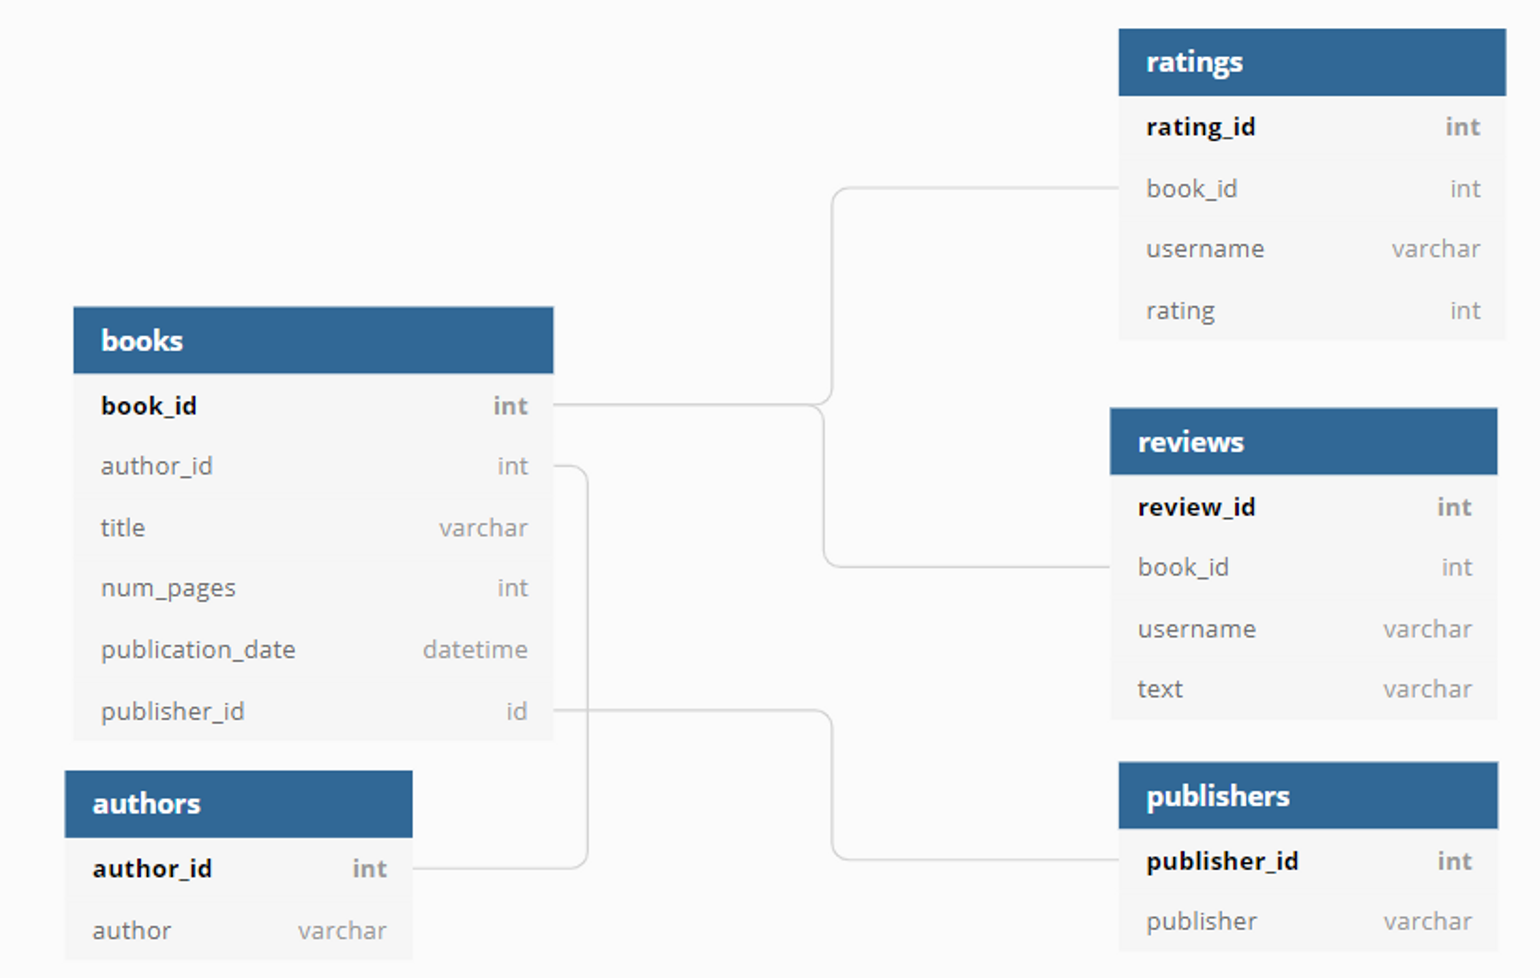

## Describe the goals of the study.

In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine


db_config = {'user': 'praktikum_student',         # user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Study the tables (print the first rows).

In [3]:
#Importing all the data 
books_df = pd.read_sql('SELECT * FROM books', engine)
authors_df = pd.read_sql('SELECT * FROM authors', engine)
publishers_df = pd.read_sql('SELECT * FROM publishers', engine)
ratings_df = pd.read_sql('SELECT * FROM ratings', engine)
reviews_df = pd.read_sql('SELECT * FROM reviews', engine)

In [4]:
#Checking the datasets
print('books:')
print(books_df.info())
print('-'*70)
print('authors:')
print(authors_df.info())
print('-'*70)
print('publishers:')
print(publishers_df.info())
print('-'*70)
print('ratings:')
print(ratings_df.info())
print('-'*70)
print('reviews:')
print(reviews_df.info())

books:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
----------------------------------------------------------------------
authors:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
--------------------------------------------------------------------

In [5]:
#Checking for duplicates
print('books:')
print(books_df.duplicated().sum())
print('-'*70)
print('authors:')
print(authors_df.duplicated().sum())
print('-'*70)
print('publishers:')
print(publishers_df.duplicated().sum())
print('-'*70)
print('ratings:')
print(ratings_df.duplicated().sum())
print('-'*70)
print('reviews:')
print(reviews_df.duplicated().sum())

books:
0
----------------------------------------------------------------------
authors:
0
----------------------------------------------------------------------
publishers:
0
----------------------------------------------------------------------
ratings:
0
----------------------------------------------------------------------
reviews:
0


In [6]:
#Checking for missing values
print('books:')
print(books_df.isna().sum())
print('-'*70)
print('authors:')
print(authors_df.isna().sum())
print('-'*70)
print('publishers:')
print(publishers_df.isna().sum())
print('-'*70)
print('ratings:')
print(ratings_df.isna().sum())
print('-'*70)
print('reviews:')
print(reviews_df.isna().sum())

books:
book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
----------------------------------------------------------------------
authors:
author_id    0
author       0
dtype: int64
----------------------------------------------------------------------
publishers:
publisher_id    0
publisher       0
dtype: int64
----------------------------------------------------------------------
ratings:
rating_id    0
book_id      0
username     0
rating       0
dtype: int64
----------------------------------------------------------------------
reviews:
review_id    0
book_id      0
username     0
text         0
dtype: int64


In [7]:
#Changing the necesarry data types
books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], format="%Y-%m-%d")

<div style="border:solid blue 2px; padding: 20px">
<span style="color:black">
    Comments:
    
<b>No Missing values and the date column was changed to datetime.</b>
    <span> 

## Make an SQL query for each of the tasks.

### Task 1: Find the number of books released after January 1, 2000

In [8]:
query1 = '''
        SELECT COUNT(*) AS num_books
        FROM books
        WHERE publication_date > '2000-01-01';
        '''

task_1 = pd.read_sql(query1, con=engine)
result1 = task_1['num_books'][0]

### Task 2: Find the number of user reviews and the average rating for each book

In [9]:
query2 = '''
        SELECT 
            books.book_id, 
            books.title, 
            COUNT(DISTINCT reviews.review_id) AS num_reviews, 
            AVG(ratings.rating) AS avg_rating
        FROM 
            books 
            LEFT JOIN reviews ON reviews.book_id = books.book_id 
            LEFT JOIN ratings ON ratings.book_id = books.book_id 
        GROUP BY 
            books.book_id 
        ORDER BY 
            num_reviews DESC;
        '''

result2 = pd.read_sql(query2, con=engine)

### Task 3: Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis)

In [10]:
query3 = '''
    SELECT publishers.publisher, 
           COUNT(books.book_id) AS num_books
    FROM publishers
    JOIN books ON publishers.publisher_id = books.publisher_id
    WHERE books.num_pages > 50
    GROUP BY publishers.publisher_id
    ORDER BY num_books DESC
    LIMIT 1;
    '''
result3 = pd.read_sql(query3, con=engine)

### Task 4: Identify the author with the highest average book rating (look only at books with at least 50 ratings).

In [11]:
query4 = '''
    SELECT 
    authors.author,
    AVG(ratings.rating) AS avg_rating
FROM 
    (SELECT 
         book_id
     FROM 
         ratings
     GROUP BY 
         book_id
     HAVING 
         COUNT(rating) >= 50) AS r50
JOIN 
    books ON r50.book_id = books.book_id
JOIN 
    ratings ON books.book_id = ratings.book_id
JOIN 
    authors ON books.author_id = authors.author_id
GROUP BY 
    authors.author
ORDER BY 
    avg_rating DESC
LIMIT 
    1;
     '''
result4 = pd.read_sql(query4, con=engine)

### Task 5: Find the average number of text reviews among users who rated more than 50 books.

In [12]:
query5 = '''
        SELECT AVG(num_text_reviews) as avg_text_reviews
    FROM (
        SELECT COUNT(*) as num_text_reviews
        FROM reviews
        WHERE username IN (
            SELECT username
            FROM ratings
            GROUP BY username
            HAVING COUNT(*) > 50
        ) AND text <> ''
        GROUP BY username
    ) as text_review_counts;
    '''
result5 = pd.read_sql(query5, con=engine)

## Output the results of each query in the Notebook. 

In [13]:
# Task 1 output:
print(f'The total number of books released after Jan 1, 2000 was:', result1 )

The total number of books released after Jan 1, 2000 was: 819


In [14]:
#Task 2 output:
result2.head()

,book_id,title,num_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081


In [15]:
#Task 3 output:
print("The Publisher with the most amount of published books with more than 50 pages")
print(result3)

The Publisher with the most amount of published books with more than 50 pages
       publisher  num_books
0  Penguin Books         42


In [16]:
#Task 4 output:
print('The Author with the highest AVG rating')
print(result4)

The Author with the highest AVG rating
                       author  avg_rating
0  J.K. Rowling/Mary GrandPré    4.287097


In [17]:
#Task 5 output:
print('The average number of text reviews for users who rated more than 50 books')
result5

The average number of text reviews for users who rated more than 50 books


,avg_text_reviews
0,24.333333


## Describe your conclusions for each of the tasks.

<div style="border:solid blue 2px; padding: 20px">
<span style="color:black">
    Conclusion:
    
<b>From task 1, we can conclude that the dataset contains a significant number of books released after 2000, 819 to be exact.

In task 2, we can see the number of reviews and average rating for each book. Twighlight has the highest number of reviews.  

Task 3 identified the publisher that has published the most books with more than 50 pages. This can be useful for understanding the publishing industry and the types of books that are being published. Penguin books published 42 50 page plus books. 

From task 4, we can conclude that J.K. Rowling/Mary GrandPré with a rating of 4.287097 is the author with the highest average rating with at least fifty ratings.

Finally, task 5 provides us with the average number of text reviews among users who rated more than 50 books. </b>
    <span> 